<center>
    <a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/IDSNlogo.png" width="300"> </a>
</center>


# From Modeling to Evaluation


Estimated time needed: **20** minutes
    

## Objectives

After completing this lab you will be able to:

* Create Models
* Evaluate the models


In [1]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

pyodide y pyfetch, que no existen localmente, descargá el archivo usando requests.

pyodide es solo para ejecución en navegador (no local).

In [ ]:
# from pyodide.http import pyfetch
#  
# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())
#  
# path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv"
#  
# #you will need to download the dataset; if you are running locally, please comment out the following 
# await download(path, "recipes.csv")

ModuleNotFoundError: No module named 'pyodide'

In [4]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv"
filename = "recipes.csv"

response = requests.get(url)
response.raise_for_status()  # Verifica que no haya errores

# Guardar el archivo localmente
with open(filename, 'wb') as f:
    f.write(response.content)

print("Archivo descargado y guardado como recipes.csv")

import pandas as pd
recipes = pd.read_csv("recipes.csv")
recipes.head()

import numpy as np
import re
import random
import matplotlib.pyplot as plt


Archivo descargado y guardado como recipes.csv


We already placed the data on an IBM server for your convenience, so download the data from the server and read the data into a dataframe called **recipes**.


In [5]:
recipes = pd.read_csv("recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


Next, repeat the preprocessing steps that you implemented in the lab **From Understanding to Preparation** to prepare the data for modeling. For more details on preparing the data, please refer to the Lab **From Understanding to Preparation**.


In [6]:
# fix name of the column displaying the cuisine
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# convert cuisine names to lower case
recipes["cuisine"] = recipes["cuisine"].str.lower()

# make the cuisine names consistent
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"


# remove data for cuisines with < 50 recipes:
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# convert all Yes's to 1's and the No's to 0's
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

C:\Users\aalvi\AppData\Local\Temp\ipykernel_16048\2572443762.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace(to_replace="No", value=0)


# Data Modeling 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%204/images/flowchart_data_modeling.png" width="500">

Now download and install more libraries and dependencies to build decision trees.


In [8]:
# import decision trees scikit-learn libraries

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

# If running locally, you can try using the graphviz library but we'll use sklearn's plot_tree method
# !conda install python-graphviz --yes
# from sklearn.tree import export_graphviz

import itertools

Check the data again!


In [9]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

## [bamboo_tree] Only Asian and Indian Cuisines

Here, *you are creating a decision tree* for the recipes for just some of the Asian (Korean, Japanese, Chinese, Thai) and Indian cuisines. The reason this action is because the decision tree does not run well when the data is biased towards one cuisine or a group of cuisines, such as in this case, American cuisines. We can exclude the American cuisines from our analysis or just build decision trees for different subsets of the data. Let's go with the second solution.

Let's build our decision tree using the data pertaining to the Asian and Indian cuisines and name our decision tree *bamboo_tree*.


In [ ]:
# select subset of cuisines
# El resultado es un nuevo DataFrame llamado asian_indian_recipes que solo contiene esas cocinas.
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]
    
# Crea una variable llamada cuisines que contiene únicamente la columna con los nombres de las cocinas.
    # Este será el vector de etiquetas que el modelo va a tratar de predecir.
cuisines = asian_indian_recipes["cuisine"]

# Crea una variable llamada ingredients que contiene todas las columnas desde la segunda en adelante (índice 1:), es decir, solo los ingredientes, sin la columna cuisine.
# Este será el conjunto de características (features) que el modelo va a usar para predecir la cocina.
ingredients = asian_indian_recipes.iloc[:,1:]


#Crea un árbol de decisión usando scikit-learn, con una profundidad máxima (niveles que va a tener) de 3. Se controla con el parámetro max depth
bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


Let's plot the decision tree and examine what the decision tree looks like.


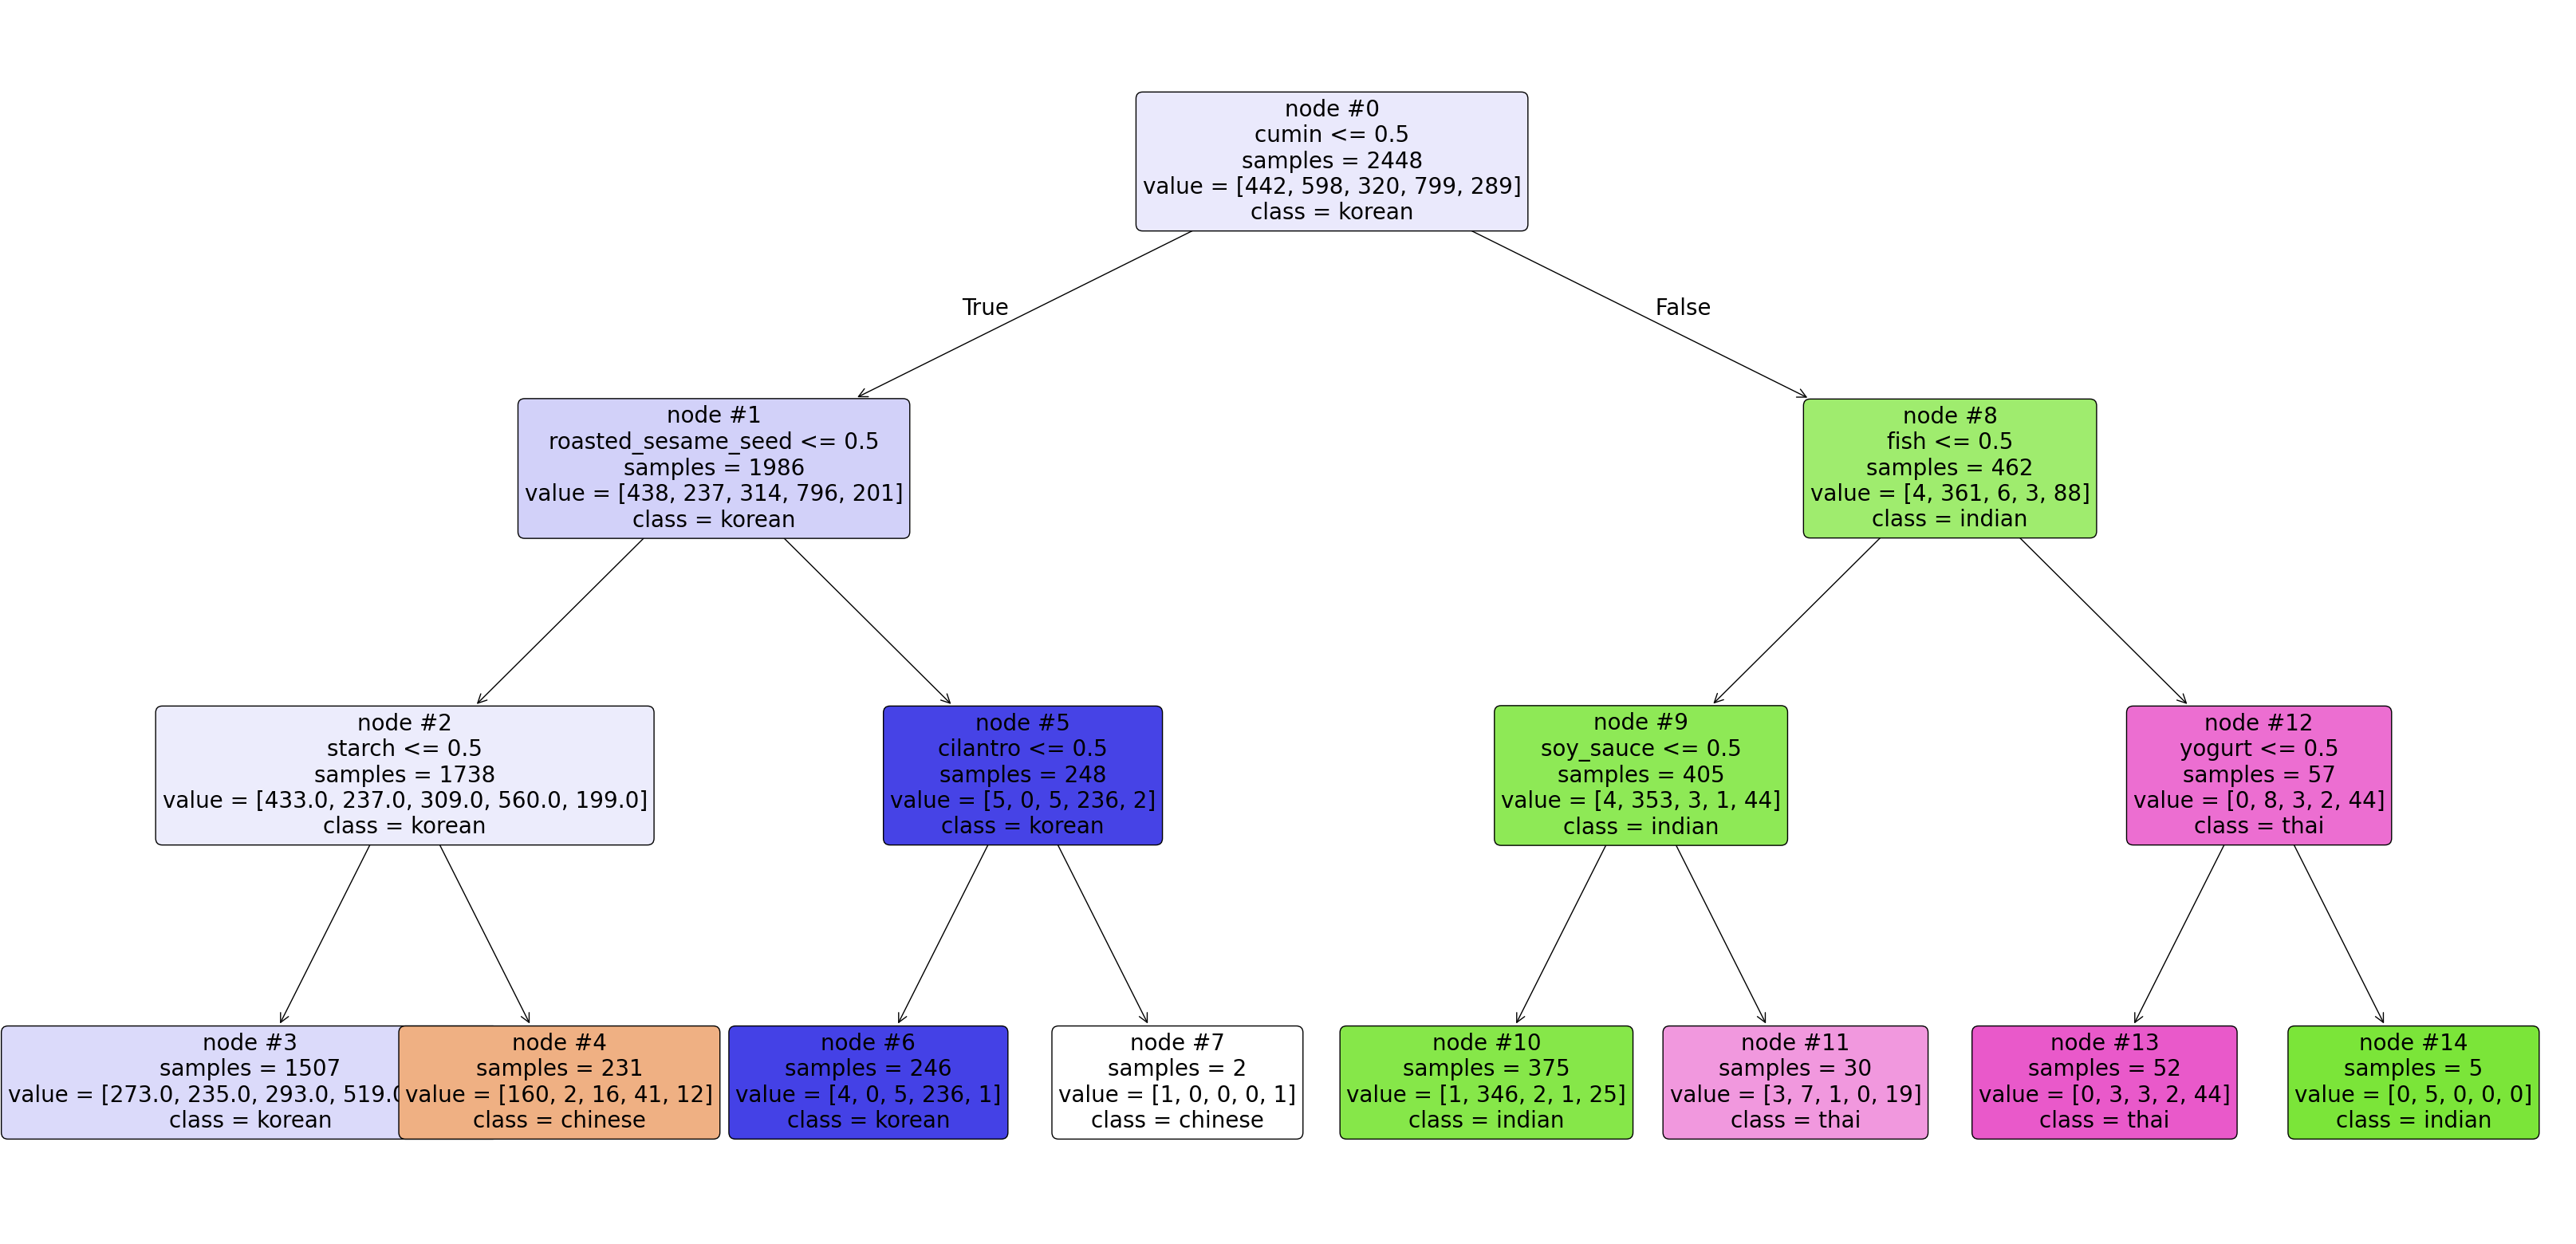

In [11]:
# if you're using the graphviz library, you can run these lines of code. Otherwise, this is configured to use plot_tree from sklearn
# export_graphviz(bamboo_tree,
#                 feature_names=list(ingredients.columns.values),
#                 out_file="bamboo_tree.dot",
#                 class_names=np.unique(cuisines),
#                 filled=True,
#                 node_ids=True,
#                 special_characters=True,
#                 impurity=False,
#                 label="all",
#                 leaves_parallel=False)

# with open("bamboo_tree.dot") as bamboo_tree_image:
#     bamboo_tree_graph = bamboo_tree_image.read()
# graphviz.Source(bamboo_tree_graph)

plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(ingredients.columns.values),
                   class_names=np.unique(cuisines),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

The decision tree learned:
* If a recipe contains *cumin* and *fish* and **no** *yoghurt*, then it is most likely a **Thai** recipe.
* If a recipe contains *cumin* but **no** *fish* and **no** *soy_sauce*, then it is most likely an **Indian** recipe.


You can analyze the remaining branches of the tree to come up with similar rules for determining the cuisine of different recipes. 

Feel free to select another subset of cuisines and build a decision tree of their recipes. You can select some European cuisines and build decision trees to explore the ingredients that differentiate those cuisines.
